# Project 2 - Problem 2: Creating Data Science Notebooks
## GIS5090 - Intro to Python Programming for GIS and Remote Sensing
### Carter Hanford
This is the Jupyter Notebook for problem 2 of project 2 in GIS5090. This problem entails creating data science notebooks exploring the **Missouri Demographic study**. The goal of this notebook/problem is to utilize ArcGIS Python API and web services, and answer a few questions regarding the study. 

* `1) - For the counties in Missouri only, what is the dominant Tapestry LifeMode Group Name.`
* `2) - Create a histrogram that shows the number of Missouri counties per Tapestry LifeMode Group Name.`
* `3) - Create a pie chart that shows the number of Missouri counties per Tapestry LifeMode Group Name.`
* `4) - For the counties in Missouri, what is the dominant Dominant Tapestry Segment Name.`
* `5) - Create a histogram that shows the number of Missouri counties per Tapestry Segment Name`
* `6) - Create a pie chart that shows the number of Missouri counties per Tapestry Segment Name.`
* `7) - Make sure the notebook is well-documented.`

Now that we've highlighted the questions and introductions, let's get started!

![](https://upload.wikimedia.org/wikipedia/en/thumb/4/4b/Saint_Louis_University_logo.svg/250px-Saint_Louis_University_logo.svg.png).

### Problem 1 
This question asks us to identify the dominant Tapestry LifeMode group name for Missouri only. Since we only want Missouri, we'll need to use a query to narrow down the data. 

Let's start with loading modules and calling the feature service data:

In [11]:
# load arcgis modules
from arcgis.gis import GIS
from arcgis.features.analysis import *
from arcgis.features import FeatureLayer

# load data viz modules
import pandas as pd
import matplotlib.pyplot as plt

# connect to ArcGIS online
gis = GIS("http://slustl.maps.arcgis.com/home", "carter.hanford_SLUSTL")

Enter password: ········


Now that we've imported the modules we need and connected to ArcGIS online, let's access the Missouri Demographic data. To do this we'll need to connect to the feature service which is available online, then use our ArcGIS online connection to load it as an object in our notebook.

In [2]:
# load feature layer data
fl = FeatureLayer(
    url='https://services.arcgis.com/P3ePLMYs2RVChkJx/ArcGIS/rest/services/Tapestry_Households/FeatureServer/1', 
    gis=gis
)

Next, the question asks us to look at only Missouri, so we'll use a search query to only include results from the state of Missouri. Then we'll write that to an spatial data frame object and take a look at the table to see what we can do with it.

In [19]:
# create data object from search query
mo_demo = fl.query(where = "STATE_NAME = 'Missouri'").sdf
mo_demo

,OBJECTID,ID,NAME,STATE_NAME,ST_ABBREV,County_AREA,TSEGNUM,TSEGCODE,TSEGNAME,THHBASE,...,THHGRPL6,THHGRPL7,THHGRPL8,THHGRPL9,THHGRPL10,THHGRPL11,THHGRPL12,THHGRPL13,THHGRPL14,SHAPE
0,1484,29001,Adair County,Missouri,MO,569.508658,38,8F,Old and Newcomers,9939,...,2312,0,2178,0,718,414,552,0,2216,"{'rings': [[[-10280362.7670118, 4916410.069564..."
1,1485,29003,Andrew County,Missouri,MO,436.317612,26,6F,Heartland Communities,6896,...,4824,0,0,0,456,0,0,0,0,"{'rings': [[[-10531483.9534014, 4884315.773069..."
2,1486,29005,Atchison County,Missouri,MO,556.848560,24,6D,Prairie Living,2480,...,1718,0,0,0,0,0,324,0,0,"{'rings': [[[-10616987.3411962, 4950653.710427..."
3,1487,29007,Audrain County,Missouri,MO,696.737302,58,12C,Small Town Simplicity,9575,...,4784,0,537,0,0,0,2879,0,0,"{'rings': [[[-10209994.3775193, 4770334.446140..."
4,1488,29009,Barry County,Missouri,MO,790.957836,46,10A,Southern Satellites,14390,...,5737,272,0,688,5942,238,382,0,0,"{'rings': [[[-10420742.210988, 4428344.5967196..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1594,29223,Wayne County,Missouri,MO,774.074683,47,10B,Rooted Rural,5526,...,844,0,0,1187,2720,0,775,0,0,"{'rings': [[[-10042980.631842, 4483088.3538738..."
111,1595,29225,Webster County,Missouri,MO,593.759317,46,10A,Southern Satellites,13299,...,3650,0,579,0,5698,0,1535,0,0,"{'rings': [[[-10336402.1117608, 4506783.785767..."
112,1596,29227,Worth County,Missouri,MO,266.848030,24,6D,Prairie Living,944,...,944,0,0,0,0,0,0,0,0,"{'rings': [[[-10487882.3352475, 4921935.643943..."
113,1597,29229,Wright County,Missouri,MO,683.011720,47,10B,Rooted Rural,7625,...,890,0,0,0,4607,0,2128,0,0,"{'rings': [[[-10269474.7189368, 4505235.714080..."


This particular question asks us to look at the dominant Tapestry LifeMode Group Name which is characterized by the variable `TLIFENAME` in this data frame. In order to find the most dominant, we can simply write the variable to an object and use the `max` function to find the largest value.

In [39]:
# set object to TLIFENAME variable 
tlife = mo_demo['TLIFENAME']
print(min(tlife))

Cozy Country Living


In Missouri, the dominant Tapestry LifeMode Group Name is 'Cozy Country Living.' 

Just for fun, I want to see what the least dominant group name is:

In [38]:
print(max(tlife))

Senior Styles


I know it may seem counter-intuitive to use `min` to locate the dominant group and `max` to locate the least dominant group, but let's take a look at a list of the data just to verify that these function calls are actually doing their job:

In [37]:
list(tlife)

['Middle Ground',
 'Cozy Country Living',
 'Cozy Country Living',
 'Hometown',
 'Rustic Outposts',
 'Cozy Country Living',
 'Cozy Country Living',
 'Cozy Country Living',
 'Rustic Outposts',
 'Middle Ground',
 'Hometown',
 'Hometown',
 'Cozy Country Living',
 'Family Landscapes',
 'Cozy Country Living',
 'Cozy Country Living',
 'Cozy Country Living',
 'Rustic Outposts',
 'Cozy Country Living',
 'Rustic Outposts',
 'Cozy Country Living',
 'Family Landscapes',
 'Rustic Outposts',
 'GenXurban',
 'Cozy Country Living',
 'Family Landscapes',
 'Cozy Country Living',
 'Rustic Outposts',
 'Rustic Outposts',
 'Rustic Outposts',
 'Cozy Country Living',
 'Cozy Country Living',
 'Rustic Outposts',
 'Rustic Outposts',
 'Rustic Outposts',
 'Cozy Country Living',
 'Rustic Outposts',
 'Cozy Country Living',
 'Family Landscapes',
 'Cozy Country Living',
 'Cozy Country Living',
 'Cozy Country Living',
 'Senior Styles',
 'Cozy Country Living',
 'Cozy Country Living',
 'Rustic Outposts',
 'Rustic Outposts

As you can see here, 'Cozy Country living' is certainly the most dominant life group listed here for Missouri.

### Problem 2
Problem 2 asks us to create a histrogram that shows the number of Missouri counties per Tapestry LifeMode Group Name.

In [25]:
tlife = mo_demo['TLIFENAME']
counties = mo_demo['NAME']

(array([12., 11., 12., 11., 11., 12., 11., 12., 11., 12.]),
 array([  0. ,  11.4,  22.8,  34.2,  45.6,  57. ,  68.4,  79.8,  91.2,
        102.6, 114. ]),
 <a list of 10 Patch objects>)

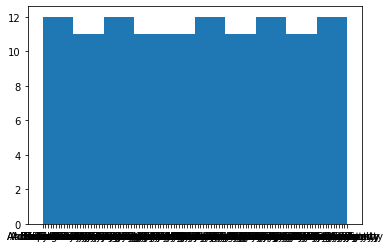

In [34]:
plt.hist(mo_demo['NAME'])